In [1]:
# importing lib.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pymongo import MongoClient
# connecting to mongoDb 
client = MongoClient('mongodb://localhost:27017/')
db = client['HealthCare']  

collection = db['AppointmentDetails']  
data = list(collection.find())  # Retrieves all documents; add query inside find() if needed


In [2]:
# loading data from a CSV file to a pandas dataframe and exploring our dataset
df = pd.DataFrame(data)

# loading dataset from csv file and showing its first 5 rows
print(df.head())


                        _id     PatientId  AppointmentID Gender  \
0  662bdc40d25641c1bad817f7  2.987250e+13        5642903      F   
1  662bdc40d25641c1bad817f8  5.589978e+14        5642503      M   
2  662bdc40d25641c1bad817f9  4.262962e+12        5642549      F   
3  662bdc40d25641c1bad817fa  8.679512e+11        5642828      F   
4  662bdc40d25641c1bad817fb  8.841186e+12        5642494      F   

         ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 18:38:08     2016-04-29   62    JARDIM DA PENHA            0   
1 2016-04-29 16:08:27     2016-04-29   56    JARDIM DA PENHA            0   
2 2016-04-29 16:19:04     2016-04-29   62      MATA DA PRAIA            0   
3 2016-04-29 17:29:31     2016-04-29    8  PONTAL DE CAMBURI            0   
4 2016-04-29 16:07:23     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0   

In [3]:
# exploring dataset by going through its data types, NaNs or duplicated rows and any columns that may need to be dropped or parsed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   _id             110527 non-null  object        
 1   PatientId       110527 non-null  float64       
 2   AppointmentID   110527 non-null  int64         
 3   Gender          110527 non-null  object        
 4   ScheduledDay    110527 non-null  datetime64[ns]
 5   AppointmentDay  110527 non-null  datetime64[ns]
 6   Age             110527 non-null  int64         
 7   Neighbourhood   110527 non-null  object        
 8   Scholarship     110527 non-null  int64         
 9   Hipertension    110527 non-null  int64         
 10  Diabetes        110527 non-null  int64         
 11  Alcoholism      110527 non-null  int64         
 12  Handcap         110527 non-null  int64         
 13  SMS_received    110527 non-null  int64         
 14  No-show         110527 non-null  obj

In [4]:
# checking for duplicates
df.duplicated().sum()


0

In [5]:
# dataset has no duplicated rows.
# exploring the unique values of each column
df.nunique()

_id               110527
PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
# Handcap and Age columns has inconsistant unique values.
# SMS_received would be casted to boolean data type.
# exploring handcap values
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [8]:
# only need rows with 0 or 1 values in Handcap
# exploring age column distribution
df['Age'].describe()


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [9]:
# Exploration Summary : 
# 1. our dataset consists of 442108 rows with 15 columns, and has no NaNs nor duplicated values.
# 2. PatientId and AppointmentId columns not needed during analysis.
# 3. ScheduledDay and AppointmentDay caste to date data type.
# 4. add a new column for days until appointment.
# 5. Gender convert into a categoy type
# 6. Scholarship, Hipertension, Diabetes,No-show Alcoholism and SMS_recieved converting to boolean data type.
# 7. Handcap colume needs to be cleaned to have only 0 and 1 values.
# 8. Age columns has inconsistant unique values.

# Data Cleaning
# Dropping PatientId and AppointmentId columns (2)
# dropping columns and validating changes
df.drop(['_id','PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.columns


Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [10]:
# Handling date data type (3)
df.AppointmentDay.unique



<bound method Series.unique of 0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]>

In [11]:
# Convert to string first if not already (safe conversion)
df['ScheduledDay'] = df['ScheduledDay'].astype(str)
df['AppointmentDay'] = df['AppointmentDay'].astype(str)

# Now extract the date part assuming ISO format (YYYY-MM-DD)
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

# Convert to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# confirming changes
print(df[['AppointmentDay', 'ScheduledDay']].dtypes)
df.head()

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# making new due days column (4)
df['due-days'] = df['AppointmentDay'] - df['ScheduledDay']

# converting data type 
df['due-days'] = df['due-days'].dt.days



In [13]:
# drop ScheduledDay and AppointmentDay col
df.drop(['AppointmentDay', 'ScheduledDay'], axis = 1, inplace = True)


In [15]:

# viewing summery statistics
df['due-days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

In [16]:
# dropping negative values from due-days column
df[df['due-days'] < 0 ]


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [42]:
df.drop(df[df['due-days'] < 0].index, inplace = True)
df['due-days'].describe()

count    71959.000000
mean        14.642018
std         16.494334
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: due-days, dtype: float64

In [49]:
# Converting Gender and No-show to categorical variables (5)
# converting column and confirming changes
df['Gender'] = df['Gender'].astype('category')

df['Gender'].dtypes



CategoricalDtype(categories=['F', 'M'], ordered=False)

In [50]:
# Converting Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_recieved to boolean data type (6)
# converting columns to bool and confirming changes
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cols] = df[cols].astype('bool')
df[cols].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

In [51]:
# Parsing and casting No-show column (6)

# mapping familiar values 
df.loc[df['No-show'] == 'Yes', 'No-show'] = 0
df.loc[df['No-show'] == 'No', 'No-show'] = 1

# casting dt type and confirming changes
df['No-show'] = df['No-show'].astype(bool)
df['No-show'].dtypes



dtype('bool')

In [17]:
# Cleaning Handcap column (7)
# viewing rows with values of handcap > 1
df[df['Handcap'] > 1]



,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
946,M,94,BELA VISTA,0,1,1,0,2,1,No,15
1665,M,64,SANTA MARTHA,0,1,0,1,2,1,No,30
1666,M,64,SANTA MARTHA,0,1,0,1,2,0,No,30
2071,M,64,SANTA MARTHA,0,1,0,1,2,0,No,0
2091,F,11,ANDORINHAS,0,0,0,0,2,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,44,ROMÃO,0,1,1,0,2,1,No,6
109484,M,64,DA PENHA,0,1,1,0,2,0,No,2
109733,F,34,JUCUTUQUARA,0,0,0,0,2,1,No,4
109975,M,39,PRAIA DO SUÁ,1,0,0,0,2,1,No,4


In [53]:
# some rows has inconsistant values, so replacing them with 1 as beeing handcaped
# filling the bigger values with 1
df.loc[df['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

# casting type and confirming changes
df['Handcap'] = df['Handcap'].astype('bool')
df['Handcap'].unique()

array([False,  True])

In [18]:
# Cleaning Age column (8)
# finding age below 0

df[df['Age'] < 0]




,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
99832,F,-1,ROMÃO,0,0,0,0,0,0,No,0


In [55]:
# dropping value with negative age
# dropping row with negative age and confirming changes
df.drop(df[df['Age'] < 0].index, inplace = True)
df[df['Age'] < 0]


,_id,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [56]:
df.head()


,_id,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,6629237bd25641c1bad4b874,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,6629237bd25641c1bad4b875,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,6629237bd25641c1bad4b876,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,6629237bd25641c1bad4b877,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,6629237bd25641c1bad4b878,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  int64 
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  object
 10  due-days       110527 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 9.3+ MB


In [20]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'due-days'],
      dtype='object')

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  int64 
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  object
 10  due-days       110527 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 9.3+ MB


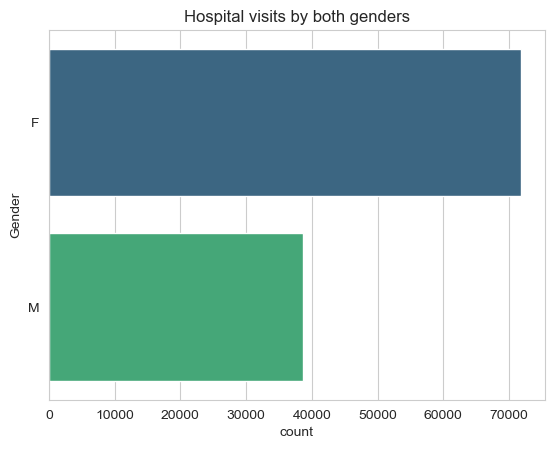

In [6]:
# data is clean now
# visualizing data to extract meaningful insights from it
# Data Visualization and EDA

# setting seaborn configurations
sns.set_style("whitegrid") 

# Research question - How frequently do males visit hospitals compared to women? Which of them is going to turn up?
# viewing count plot of gender distribution in our dataset
sns.countplot(y = 'Gender', data = df, palette='viridis')
plt.title("Hospital visits by both genders")
plt.show()


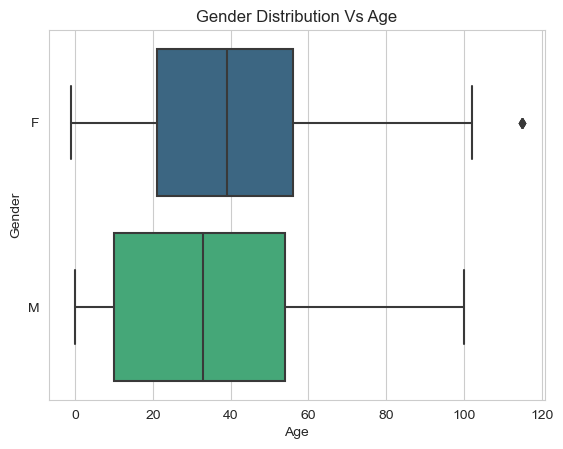

In [7]:
# viewing count plot of gender distribution against age in our dataset
sns.boxplot(x = 'Age', y = 'Gender', data = df, palette='viridis')
plt.title("Gender Distribution Vs Age")
plt.show()

In [75]:
df['No-show'].value_counts()

True     88207
False    22319
Name: No-show, dtype: int64

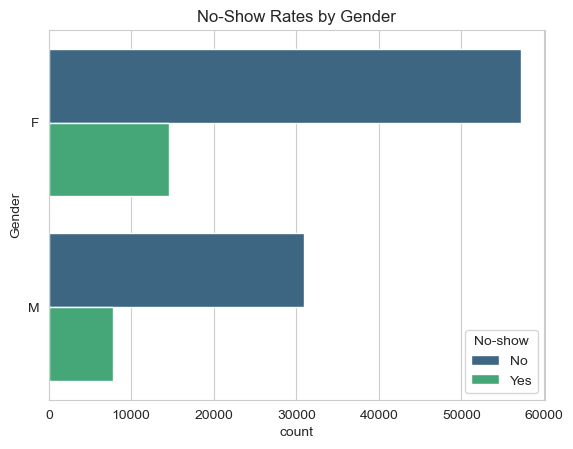

In [8]:
# answer - half of our dataset conists of women with wider age distribution and some outliers, all of which has a rate higher than men.
# 79.81% of our patients did not show up on their appointments and only 20.19% of them did.

# 1.relationship between gender and no-show rates
sns.countplot(y = 'Gender', data = df, hue = 'No-show', palette='viridis')
plt.title('No-Show Rates by Gender')
plt.show()

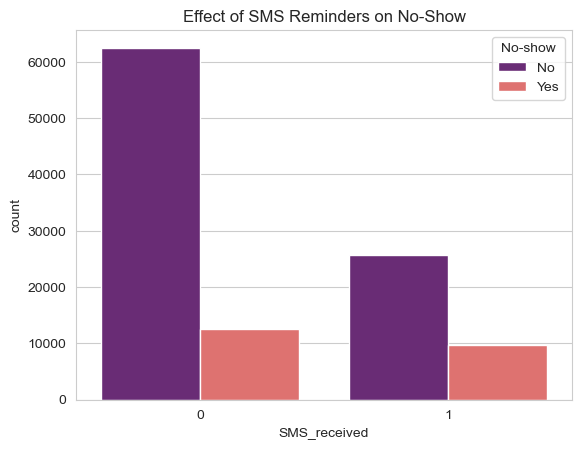

In [10]:
# Conclusion 
# From the chart, we conclude that women attend appointments more than men, but this may be affected by the percentage of women on this dataset.
# 2. Does recieving an SMS as a reminder affect whether or not a patient may show up? 
sns.countplot(x='SMS_received', hue = 'No-show', palette='magma', data=df)
plt.title('Effect of SMS Reminders on No-Show')
plt.show()

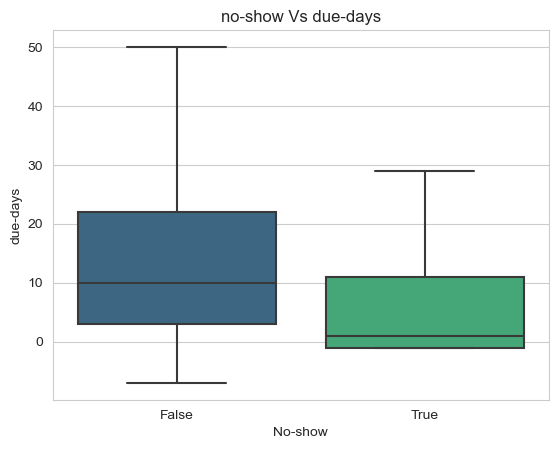

In [93]:
# the vast majority of our patients did not recieve any SMS reminder and yet they showed up on their appointments.

# viewing the correlation between no-show and due-days without outliers
sns.boxplot(x = 'No-show', y = 'due-days', data = df, showfliers = False, palette='viridis')
plt.title('no-show Vs due-days')
plt.show()


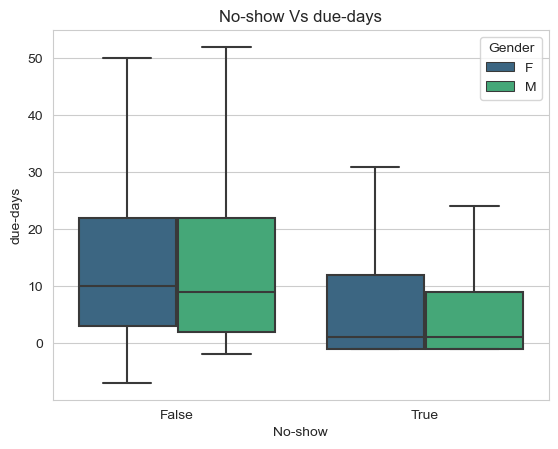

In [95]:
# Patients with appointments ranging from 0 to 20 days are more likely to show up, but patients with over twenty days between appointments are less likely to appear.
# Examining the association between no-shows and due dates without outliers according to gender

sns.boxplot(x = 'No-show', y = 'due-days', data = df, hue = 'Gender', showfliers = False, palette='viridis')
plt.title('No-show Vs due-days')
plt.show()

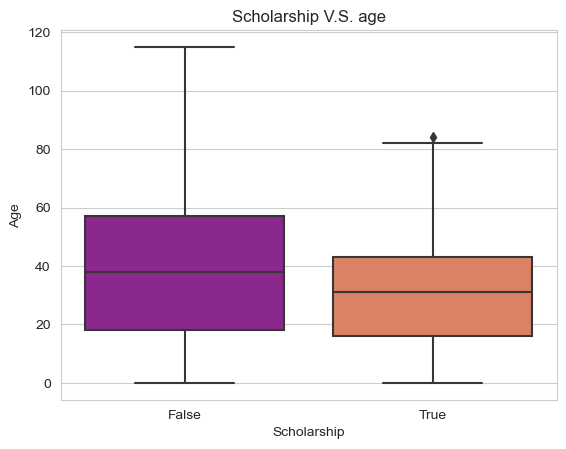

In [100]:
# Gender has not much impact on the number of due dates or turning up for an appointment.

# Does getting a scholarship(Brasilian welfare program) have an impact on attending a healthcare appointment? Which age groups are these affecting?

# plotting having a scholarship against age
sns.boxplot(x = 'Scholarship', y = 'Age', data = df, palette='plasma')
plt.title('Scholarship V.S. age')
plt.show()

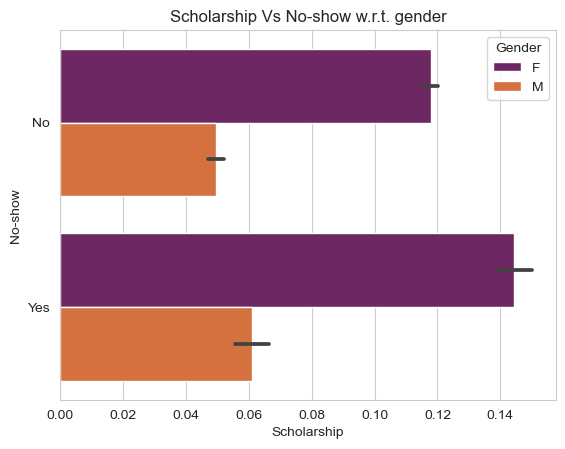

In [11]:
# illustrating scholarship versus no show with respect to gender.
sns.barplot(x = 'Scholarship', y = 'No-show', hue = 'Gender', data = df, palette="inferno")
plt.title('Scholarship Vs No-show w.r.t. gender')
plt.show()

Text(0.5, 0, 'Age')

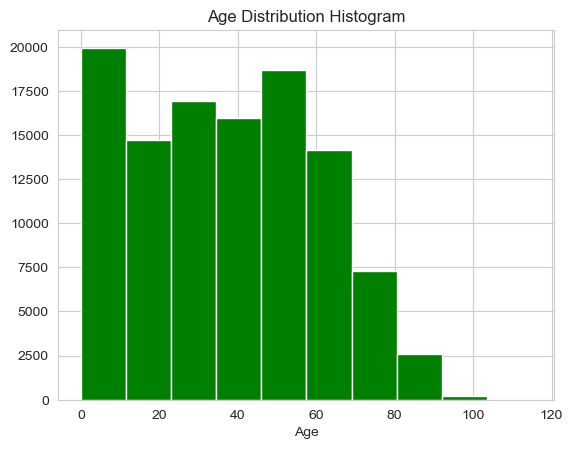

In [116]:
# age distribution
df['Age'].hist(color='green')
plt.title('Age Distribution Histogram')
plt.xlabel("Age")

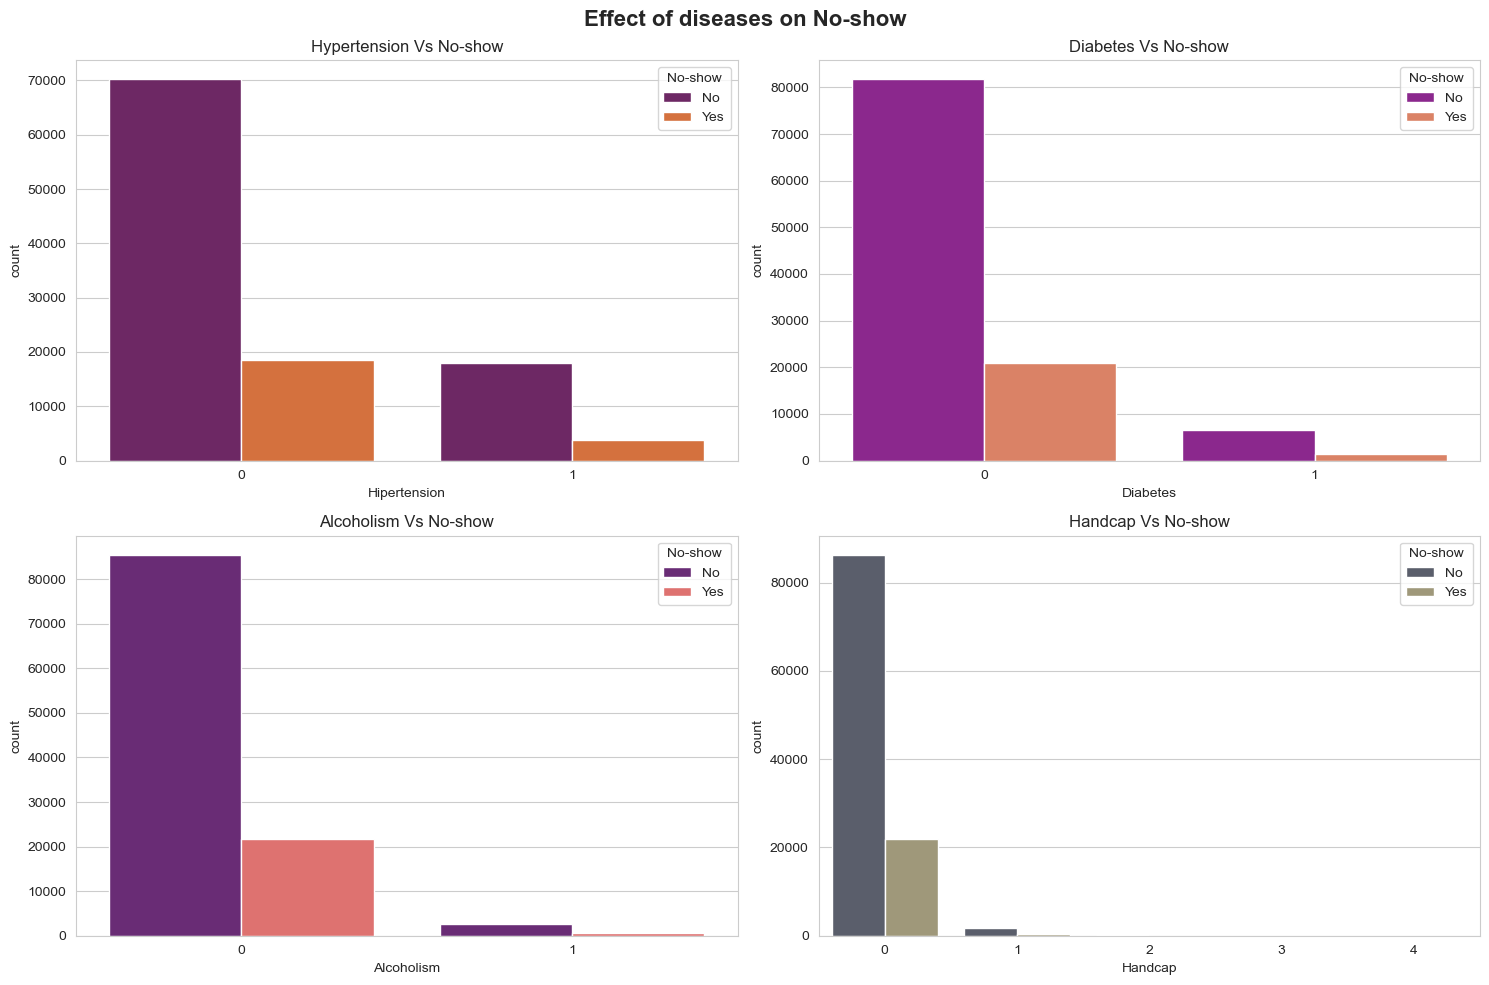

In [33]:
# Scholarships had no effect on attending up for doctor appointments, although a large age group is enrolled in them, as are their babies.

# Is the state of the illness a factor in a patient's appointment? Will the condition of being unwell make a patient cancel their appointment? is it related to gender or not a gender issue?
# plotting diseases vs no show
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2,2,1)
sns.countplot(x = 'Hipertension', data = df, hue= 'No-show', palette="inferno")
ax1.set_title('Hypertension Vs No-show') 

ax2 = plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = df, hue= 'No-show', palette="plasma")
ax2.set_title('Diabetes Vs No-show')

ax3 = plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = df, hue= 'No-show', palette="magma")
ax3.set_title('Alcoholism Vs No-show')

ax4 = plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', data = df, hue= 'No-show', palette="cividis")
ax4.set_title('Handcap Vs No-show')

plt.suptitle('Effect of diseases on No-show', fontsize=16, fontweight='bold')

plt.tight_layout() 
plt.show()


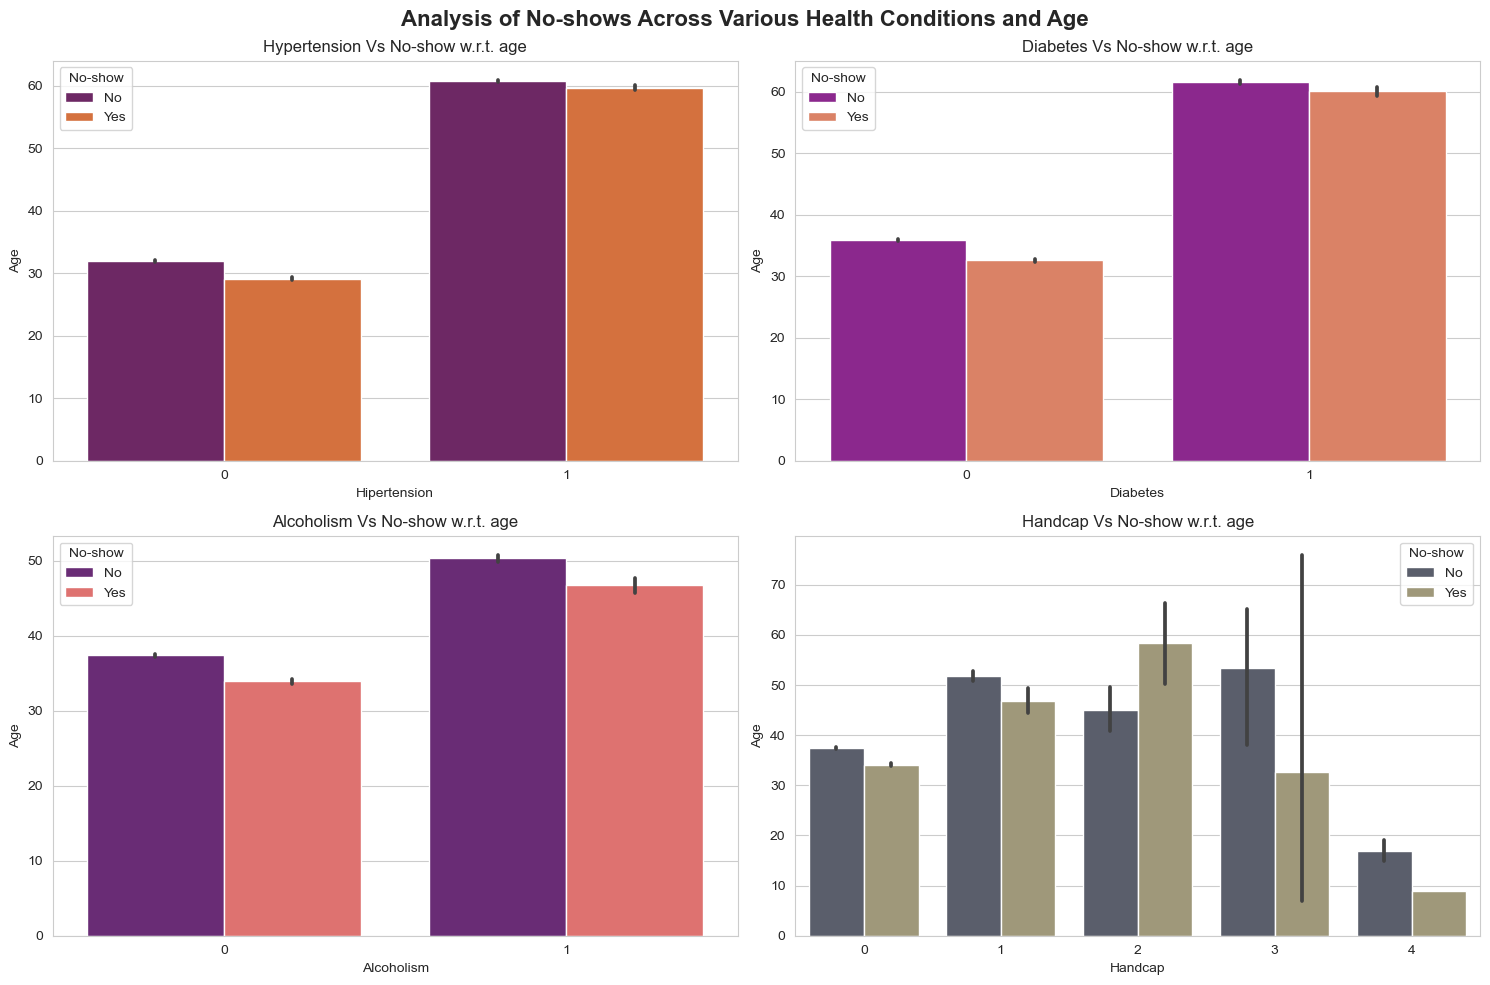

In [32]:
# plotting dIseases Vs no-show with respect to age
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
sns.barplot(x='Hipertension', y='Age', data=df, hue='No-show', palette="inferno")
ax1.set_title('Hypertension Vs No-show w.r.t. age') 

ax2 = plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = df, hue= 'No-show', palette="plasma")
ax2.set_title('Diabetes Vs No-show w.r.t. age')

ax3 = plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = df, hue= 'No-show', palette="magma")
ax3.set_title('Alcoholism Vs No-show w.r.t. age')

ax4 = plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = df, hue= 'No-show', palette="cividis")
ax4.set_title('Handcap Vs No-show w.r.t. age')

plt.suptitle('Analysis of No-shows Across Various Health Conditions and Age', fontsize=16, fontweight='bold')

plt.tight_layout() 
plt.show()






In [ ]:
# vast majority of data does not have chronic deseases, yet, they are existed in so many young people.
# having a chronic disease may affect showing up rate at a hospital's appointment.
